In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ILOVEDART/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ILOVEDART/test.csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/ILOVEDART/sample_submission.csv')

id  : 매물 고유 아이디\
brand : 차 브랜드\
model : 차량 모델명\
release year : 차량 제조 연도\
mileage : 차량 주행 거리\
fuel type : 차량 연료 유형\
engine : 차량 엔진 타입\
transmission : 차량 변속기 유형\
exterior color : 차량 외장 색상\
interior color : 차량 내장 색상\
accident report : 차량 사고 이력\
clear title : 클린 타이틀(운행에 중대한 지장을 주는 사고 X)\
price : 가격


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150826 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               150826 non-null  int64 
 1   brand            150826 non-null  object
 2   model            150826 non-null  object
 3   release_year     150826 non-null  int64 
 4   milage           150826 non-null  object
 5   fuel_type        146741 non-null  object
 6   engine           150826 non-null  object
 7   transmission     150826 non-null  object
 8   exterior_color   150826 non-null  object
 9   interior_color   150826 non-null  object
 10  accident_report  148835 non-null  object
 11  clean_title      133621 non-null  object
 12  price            150826 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.0+ MB


In [ ]:
train.head()

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,0,Jeep,Gladiator Overland,2019,4.1k,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500
1,1,Chrysler,300M Base,2004,45.0k,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.5k,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000
3,3,Ford,F-150 Lariat,2013,28.0k,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.3k,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400


In [ ]:
train.describe()

,id,release_year,price
count,150826.000000,150826.000000,1.508260e+05
mean,75412.500000,2015.831216,4.385627e+04
std,43539.860188,5.657641,7.792089e+04
min,0.000000,1974.000000,2.000000e+03
25%,37706.250000,2013.000000,1.700000e+04
50%,75412.500000,2017.000000,3.082500e+04
75%,113118.750000,2020.000000,4.990000e+04
max,150825.000000,2024.000000,2.954083e+06


In [ ]:
b = df[df['brand'] == 'Tesla']
b

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
41,41,Tesla,Model X Base,2023,6.0,NaN,670.0HP Electric Motor Electric Fuel System,Automatic Transmission,White,Black,None reported,Yes,50000
76,76,Tesla,Model S 75D,2014,119.0,NaN,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,Gray,Black,None reported,Yes,15750
91,91,Tesla,Model X P100D,2019,67.0,Gasoline,Electric Motor Electric Fuel System,Automatic Transmission,White,Black,None reported,Yes,34700
159,159,Tesla,Model 3 Long Range,2018,36.0,NaN,Electric,Automatic,Gray,Black,None reported,NaN,48998
169,169,Tesla,Model S P100D,2021,13.0,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed Automatic Transmission,White,Black,None reported,Yes,77999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150668,150668,Tesla,Model X 75D,2019,5.0,NaN,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,Black,Black,None reported,Yes,64500
150685,150685,Tesla,Model Y Long Range,2017,98.0,NaN,425.0HP Electric Motor Electric Fuel System,1-Speed Automatic Transmission,White,White,None reported,Yes,34900
150691,150691,Tesla,Model Y Performance,2020,35.0,NaN,455.0HP Electric Motor Electric Fuel System,Automatic Transmission,Black,Black,None reported,Yes,49273
150756,150756,Tesla,Model X 75D,2017,36.0,NaN,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,Black,Black,None reported,Yes,61000


In [ ]:
b[b['fuel_type'] == 'Gasoline']

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
91,91,Tesla,Model X P100D,2019,67.0,Gasoline,Electric Motor Electric Fuel System,Automatic Transmission,White,Black,None reported,Yes,34700
1774,1774,Tesla,Model Y Long Range,2018,41.0,Gasoline,425.0HP Electric Motor Electric Fuel System,Automatic Transmission,White,Black,1 or more accident reported,Yes,48500
2404,2404,Tesla,Model S P100D,2018,46.0,Gasoline,518.0HP Electric Motor Electric Fuel System,1-Speed Automatic Transmission,Black,White,None reported,Yes,28750
2953,2953,Tesla,Model X 75D,2017,74.0,Gasoline,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,White,Beige,None reported,Yes,24500
3611,3611,Tesla,Model Y Long Range,2022,4.0,Gasoline,Dual Motor - Standard,Automatic,Gray,Black,None reported,NaN,40999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147291,147291,Tesla,Model 3 Performance,2018,28.0,Gasoline,455.0HP Electric Motor Electric Fuel System,Automatic Transmission,White,White,None reported,Yes,40500
147417,147417,Tesla,Model 3 Standard Range Plus,2018,35.0,Gasoline,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,Orange,Black,None reported,Yes,110000
148362,148362,Tesla,Model Y Performance,2022,1.0,Gasoline,285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,Automatic Transmission,White,Black,None reported,Yes,50000
149588,149588,Tesla,Model S 100D,2017,63.0,Gasoline,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,Silver,Black,1 or more accident reported,Yes,18500


In [ ]:
df['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,2750
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2341
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2288
2.0L I4 16V GDI DOHC Turbo,2123
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1964
...,...
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas,1
70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel,1


In [ ]:
df['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,132840
Hybrid,5449
E85 Flex Fuel,4296
Diesel,3124
–,614
Plug-In Hybrid,405
not supported,13


In [ ]:
a = df[df['fuel_type'].isna()]
a

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
41,41,Tesla,Model X Base,2023,6.0,NaN,670.0HP Electric Motor Electric Fuel System,Automatic Transmission,White,Black,None reported,Yes,50000
76,76,Tesla,Model S 75D,2014,119.0,NaN,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,Gray,Black,None reported,Yes,15750
132,132,Audi,Q7 3.0T Prestige,2016,98.0,NaN,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,White,Black,None reported,Yes,29995
159,159,Tesla,Model 3 Long Range,2018,36.0,NaN,Electric,Automatic,Gray,Black,None reported,NaN,48998
169,169,Tesla,Model S P100D,2021,13.0,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed Automatic Transmission,White,Black,None reported,Yes,77999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150685,150685,Tesla,Model Y Long Range,2017,98.0,NaN,425.0HP Electric Motor Electric Fuel System,1-Speed Automatic Transmission,White,White,None reported,Yes,34900
150691,150691,Tesla,Model Y Performance,2020,35.0,NaN,455.0HP Electric Motor Electric Fuel System,Automatic Transmission,Black,Black,None reported,Yes,49273
150727,150727,Audi,e-tron Prestige,2017,68.0,NaN,170.0HP 0.65L Electric Motor Electric Fuel System,Automatic Transmission,Blue,Beige,None reported,Yes,15500
150756,150756,Tesla,Model X 75D,2017,36.0,NaN,518.0HP Electric Motor Electric Fuel System,Automatic Transmission,Black,Black,None reported,Yes,61000


In [ ]:
a['brand'].value_counts()

,count
brand,
Tesla,2716
Rivian,397
Ford,345
Porsche,155
Audi,88
Kia,48
Mercedes-Benz,48
BMW,45
Nissan,45


In [ ]:
train.isna().sum()

,0
id,0
brand,0
model,0
release_year,0
milage,0
fuel_type,4085
engine,0
transmission,0
exterior_color,0
interior_color,0


In [ ]:
# 결측치 어떻게 대체할지

accident_report 결측치 삭제\
fuel_type 결측치 대체 -> 브랜드별 최빈값으로 대체



<ipython-input-26-971060a6992b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.index, y=brand_price.values, palette="viridis")


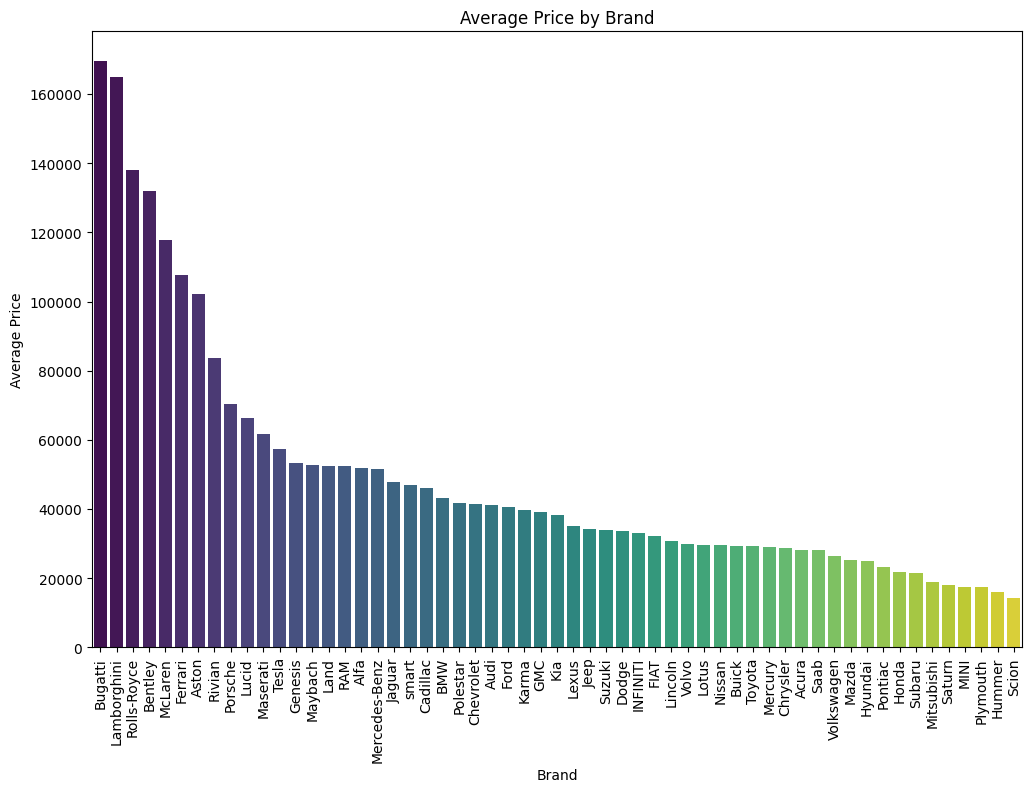

In [ ]:
brand_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_price.index, y=brand_price.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.show()

<ipython-input-150-2ceaab13d58f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price_median.index, y=brand_price_median.values, palette="viridis")


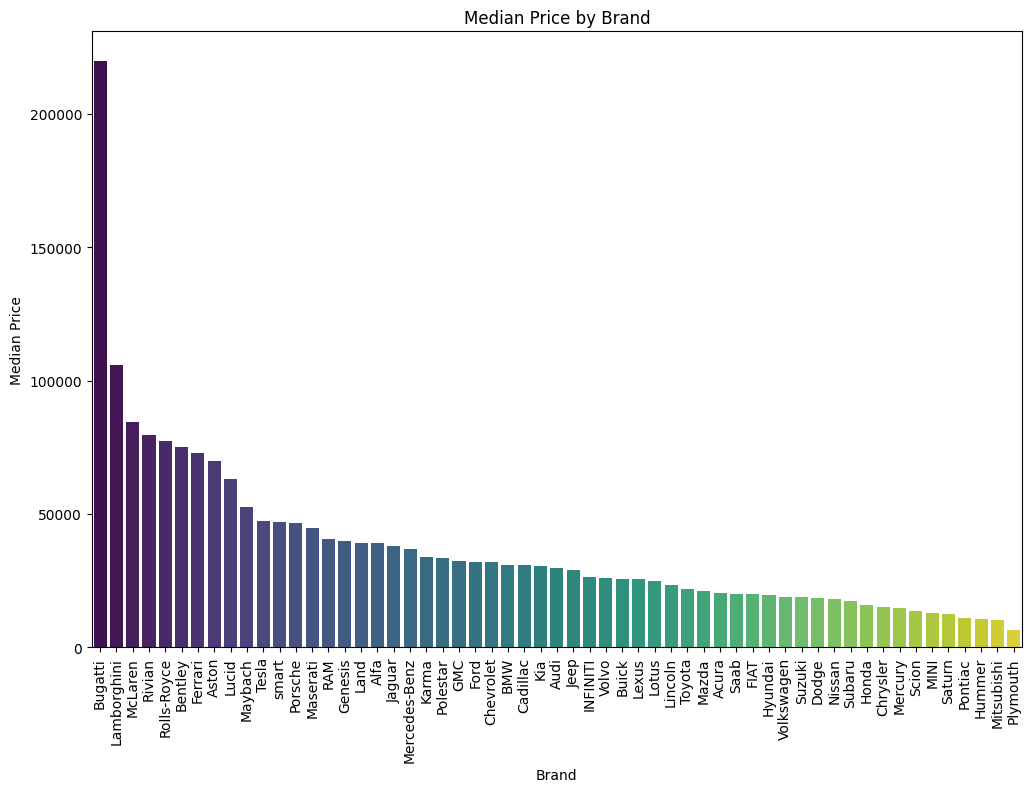

In [ ]:
# 브랜드별 중앙값 계산
brand_price_median = df.groupby('brand')['price'].median().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_price_median.index, y=brand_price_median.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Median Price')
plt.title('Median Price by Brand')
plt.show()


고가 브랜드 차량이랑 중저가 브랜드 차량으로 나눠야할 듯

In [ ]:
brand_price_avg = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# 결과 출력
print(brand_price_avg)

brand
Bugatti          169600.000000
Lamborghini      164904.494574
Rolls-Royce      137975.194836
Bentley          132005.557734
McLaren          117720.355556
Ferrari          107795.767528
Aston            102280.060440
Rivian            83767.812766
Porsche           70493.751294
Lucid             66427.274510
Maserati          61578.269437
Tesla             57342.366501
Genesis           53469.268448
Maybach           52850.000000
Land              52577.022721
RAM               52508.409681
Alfa              51854.590909
Mercedes-Benz     51452.163656
Jaguar            47696.318057
smart             46998.500000
Cadillac          46186.730584
BMW               43233.259750
Polestar          41754.857143
Chevrolet         41588.140995
Audi              41112.274380
Ford              40553.679442
Karma             39618.000000
GMC               39027.788469
Kia               38306.997041
Lexus             34993.852818
Jeep              34241.916246
Suzuki            34066.500000
Do

<ipython-input-17-8f38e34255d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='brand', y='price', palette="viridis")


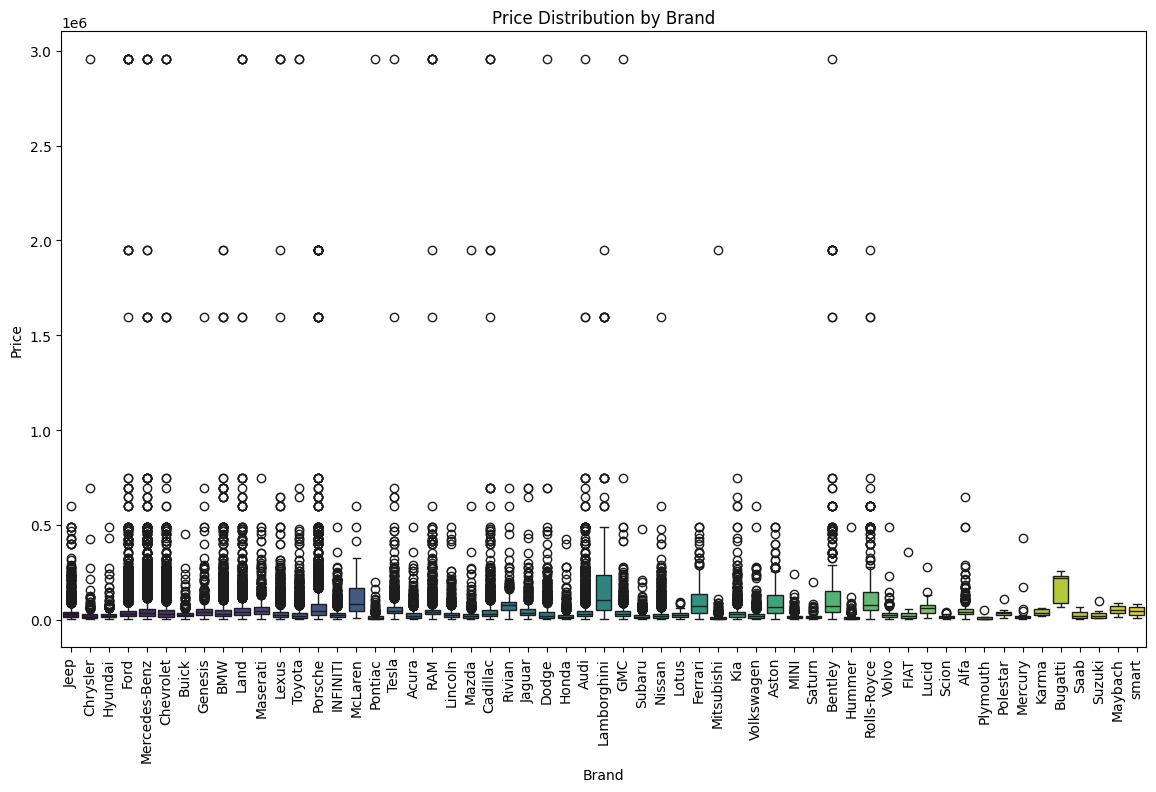

In [ ]:
# 브랜드별 가격 박스플롯 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='brand', y='price', palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution by Brand')
plt.show()

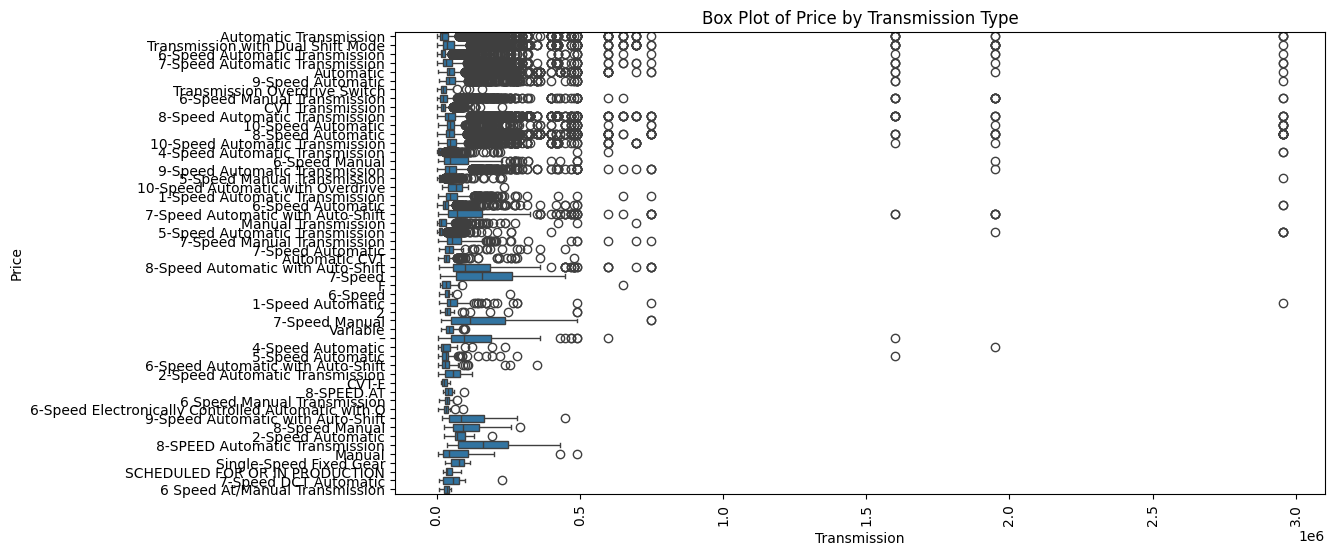

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='transmission', data=df,orient='h')
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

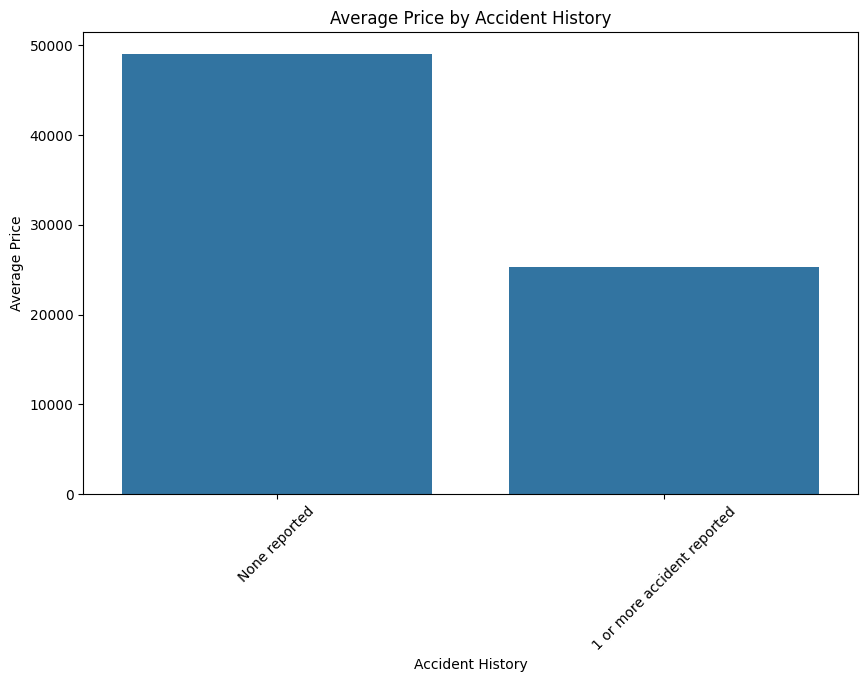

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident_report', y='price', data=df, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

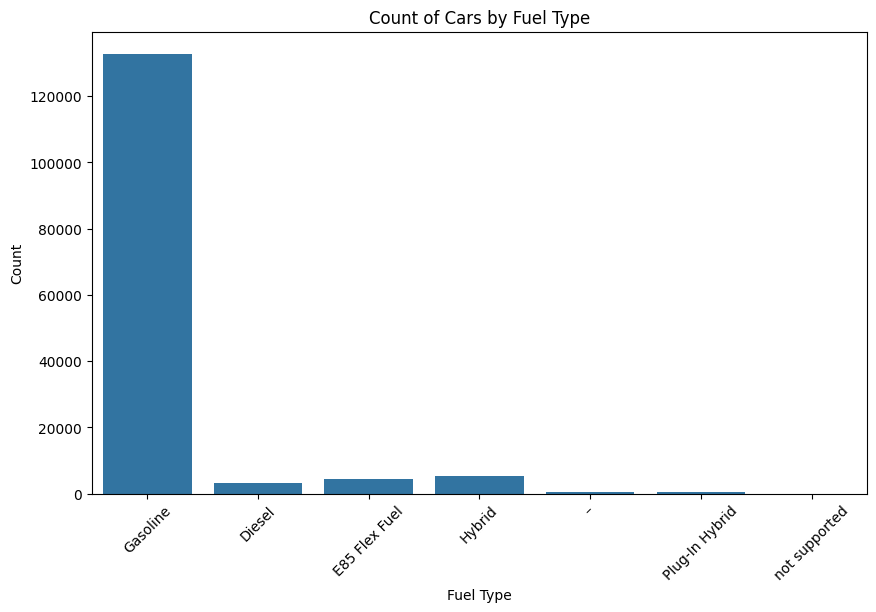

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-aae54e054fc6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_price_avg.index, y=fuel_price_avg.values, palette="crest")


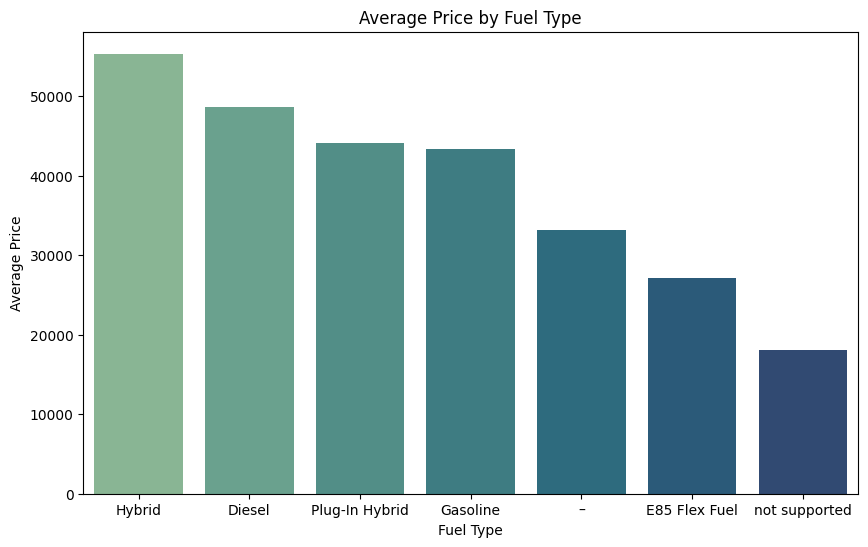

In [ ]:
# fuel_type별 평균 가격 계산
fuel_price_avg = df.groupby('fuel_type')['price'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_price_avg.index, y=fuel_price_avg.values, palette="crest")
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type')
plt.show()

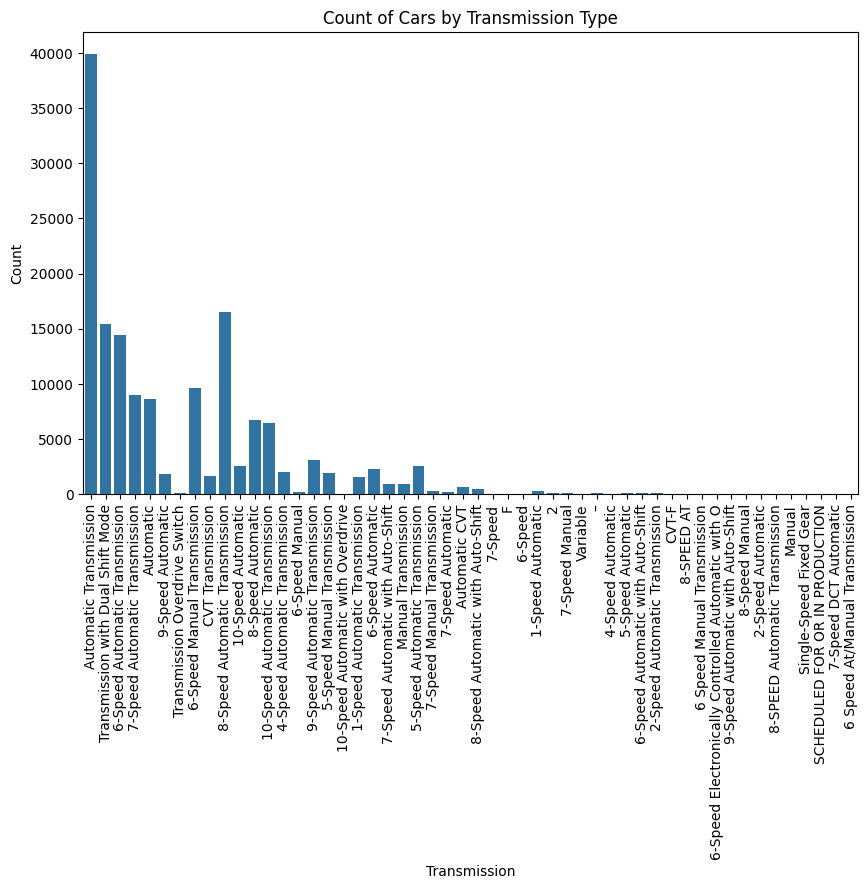

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import gc
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

gc.collect()

brand: 57 unique values
model: 1896 unique values
milage: 6037 unique values
fuel_type: 7 unique values
engine: 1115 unique values
transmission: 52 unique values
exterior_color: 319 unique values
interior_color: 156 unique values
accident_report: 2 unique values
clean_title: 1 unique values


70308

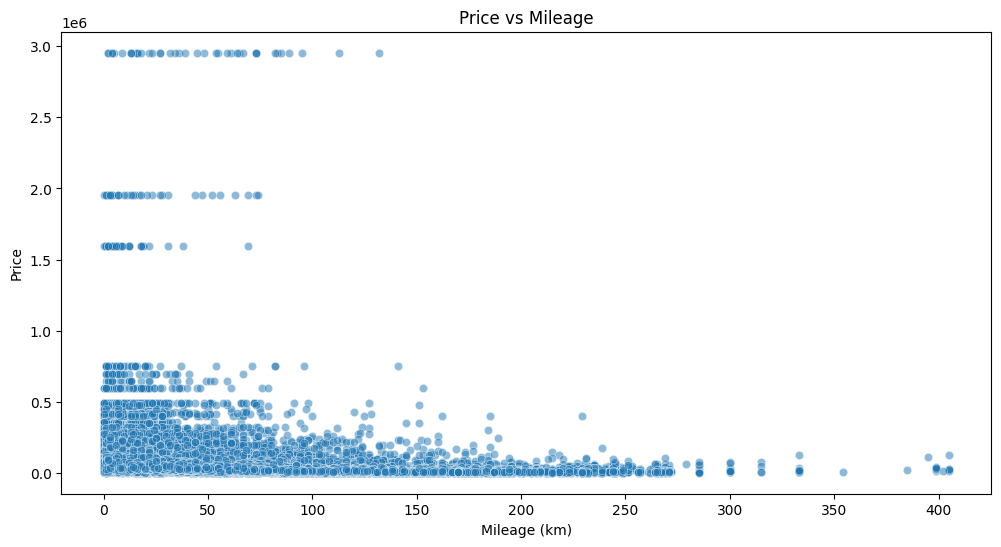

In [ ]:
# mileage 컬럼을 숫자형으로 변환 (예: "50,000 km" -> 50000)
#df['milage'] = df['milage'].str.replace(',', '').str.extract('(\d+)').astype(float)

# 시각화: mileage와 price 간의 관계
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='milage', y='price', alpha=0.5)
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.title('Price vs Mileage')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150826 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               150826 non-null  int64  
 1   brand            150826 non-null  object 
 2   model            150826 non-null  object 
 3   release_year     150826 non-null  int64  
 4   milage           150826 non-null  float64
 5   fuel_type        146741 non-null  object 
 6   engine           150826 non-null  object 
 7   transmission     150826 non-null  object 
 8   exterior_color   150826 non-null  object 
 9   interior_color   150826 non-null  object 
 10  accident_report  148835 non-null  object 
 11  clean_title      133621 non-null  object 
 12  price            150826 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 15.0+ MB


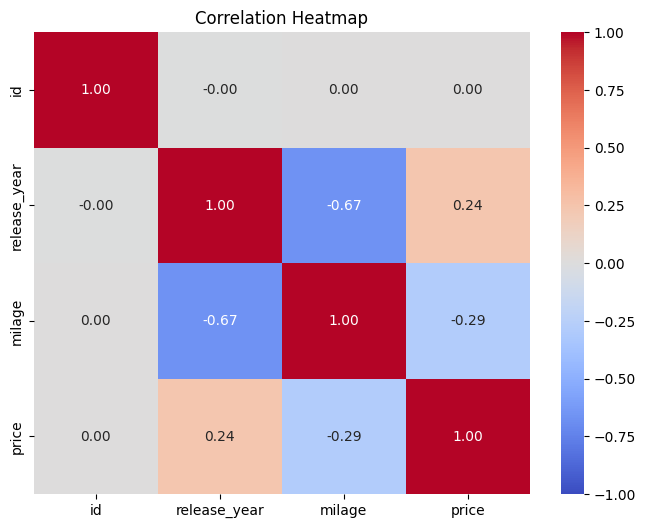

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 변수들만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# 전처리



In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ILOVEDART/train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150826 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               150826 non-null  int64 
 1   brand            150826 non-null  object
 2   model            150826 non-null  object
 3   release_year     150826 non-null  int64 
 4   milage           150826 non-null  object
 5   fuel_type        146741 non-null  object
 6   engine           150826 non-null  object
 7   transmission     150826 non-null  object
 8   exterior_color   150826 non-null  object
 9   interior_color   150826 non-null  object
 10  accident_report  148835 non-null  object
 11  clean_title      133621 non-null  object
 12  price            150826 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.0+ MB


In [ ]:
train.isna()

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,False,False,False,False,False,False,False,False,False,False,False,False,False
150822,False,False,False,False,False,False,False,False,False,False,False,False,False
150823,False,False,False,False,False,False,False,False,False,False,False,True,False
150824,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isna().sum()

,0
id,0
brand,0
model,0
release_year,0
milage,0
fuel_type,4085
engine,0
transmission,0
exterior_color,0
interior_color,0


In [ ]:
df = train.copy()

In [ ]:
# 'accident_report' 컬럼에 결측치가 있는 행 제거
df_cleaned = df.dropna(subset=['accident_report'])

# 결측치가 제거된 데이터 확인
print(df_cleaned.isnull().sum())

id                     0
brand                  0
model                  0
release_year           0
milage                 0
fuel_type           4029
engine                 0
transmission           0
exterior_color         0
interior_color         0
accident_report        0
clean_title        15225
price                  0
dtype: int64


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148835 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148835 non-null  int64 
 1   brand            148835 non-null  object
 2   model            148835 non-null  object
 3   release_year     148835 non-null  int64 
 4   milage           148835 non-null  object
 5   fuel_type        144806 non-null  object
 6   engine           148835 non-null  object
 7   transmission     148835 non-null  object
 8   exterior_color   148835 non-null  object
 9   interior_color   148835 non-null  object
 10  accident_report  148835 non-null  object
 11  clean_title      133610 non-null  object
 12  price            148835 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,131141
Hybrid,5383
E85 Flex Fuel,4233
Diesel,3039
–,600
Plug-In Hybrid,397
not supported,13


In [ ]:
df_cleaned = df_cleaned[df_cleaned['fuel_type'] != 'not supported']
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        144793 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      133597 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
# 'brand'가 'Tesla'인 행의 'fuel_type'을 'electric'으로 변경
df_cleaned.loc[df_cleaned['brand'] == 'Tesla', 'fuel_type'] = 'electric'

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        147485 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      133597 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
# 각 브랜드별 fuel_type의 최빈값 계산
fuel_mode_by_brand = df_cleaned.groupby('brand')['fuel_type'].agg(lambda x: x.mode()[0])

# 결측치를 각 브랜드의 최빈값으로 채우기
df_cleaned['fuel_type'] = df_cleaned.apply(
    lambda row: fuel_mode_by_brand[row['brand']] if pd.isnull(row['fuel_type']) else row['fuel_type'], axis=1
)

# 결과 확인
print(df_cleaned['fuel_type'].isnull().sum())


0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        148822 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      133597 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned['clean_title'].value_counts()

,count
clean_title,
Yes,133597


In [ ]:
df_cleaned['clean_title'].isna().sum()

15225

In [ ]:
df_cleaned[df_cleaned['clean_title'].isna()]

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
8,8,Buick,Envision Essence,2022,20.104k,Gasoline,2.5L I4 16V GDI DOHC,9-Speed Automatic,Summit White,Jet Black,None reported,NaN,27785
21,21,Mercedes-Benz,AMG G 63 Base,2023,19.593k,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,9-Speed Automatic,Gray,Black,None reported,NaN,107900
45,45,Mercedes-Benz,AMG GT 53 Base,2022,1.966k,Gasoline,4.0L V8 32V MPFI DOHC Twin Turbo,9-Speed Automatic,Vega Blue,Black,None reported,NaN,46599
51,51,Cadillac,Escalade ESV Premium Luxury Platinum,2022,16.648k,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,10-Speed Automatic with Overdrive,Black,Ebony,1 or more accident reported,NaN,69900
53,53,Porsche,Cayman GT4,2018,73.549k,Gasoline,3.4L H6 24V MPFI DOHC,6-Speed Manual,Alpine White,Black,None reported,NaN,44750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150784,150784,Mercedes-Benz,SL-Class SL550 Roadster,2022,13.613k,Gasoline,4.0 Liter Twin Turbo,Automatic,Silver,Black,None reported,NaN,28998
150798,150798,Nissan,Murano SV,2020,20.598k,Gasoline,2.5L I4 16V PDI DOHC Turbo,Automatic CVT,Sunset Drift Chromaflair,Graphite,None reported,NaN,25498
150814,150814,Chevrolet,Silverado 1500 ZR2,2022,4.785k,Gasoline,6.2L V8 16V GDI OHV,Automatic,Glacier Blue Metallic,Jet Black,None reported,NaN,68590
150817,150817,RAM,1500 Big Horn,2022,14.92k,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Maximum Steel Metallic,Black,None reported,NaN,41299


In [ ]:
# 'accident_report'가 'None_reported'이고, 'clean_title'이 NaN인 행에서 'clean_title' 값을 'Yes'로 변경
df_cleaned.loc[(df_cleaned['accident_report'] == 'None reported') & (df_cleaned['clean_title'].isna()), 'clean_title'] = 'Yes'

# 변경된 데이터 확인
print(df_cleaned[(df_cleaned['accident_report'] == 'None reported') & (df_cleaned['clean_title'] == 'Yes')])


            id          brand                                     model  \
0            0           Jeep                        Gladiator Overland   
1            1       Chrysler                                 300M Base   
6            6           Ford                          F-250 King Ranch   
7            7  Mercedes-Benz                             E-Class E 350   
8            8          Buick                          Envision Essence   
...        ...            ...                                       ...   
150819  150819       Chrysler                                Sebring LX   
150821  150821           Land  Rover Range Rover Sport Supercharged HSE   
150823  150823  Mercedes-Benz                      C-Class C 300 4MATIC   
150824  150824         Nissan                           350Z Enthusiast   
150825  150825      Chevrolet                             Corvette Base   

        release_year    milage fuel_type  \
0               2019      4.1k  Gasoline   
1          

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        148822 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      147885 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned[df_cleaned['clean_title'].isna()]

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
51,51,Cadillac,Escalade ESV Premium Luxury Platinum,2022,16.648k,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,10-Speed Automatic with Overdrive,Black,Ebony,1 or more accident reported,NaN,69900
138,138,Ferrari,Huracan LP580-2S,2020,3.254k,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Rosso Mars Metallic,Nero Ade,1 or more accident reported,NaN,42590
202,202,RAM,1500 Big Horn,2021,45.277k,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Billet Silver Metallic Clearcoat,Black,1 or more accident reported,NaN,25695
288,288,Jeep,Wrangler Sport,2020,25.24k,Gasoline,2.0L I4 16V GDI DOHC Turbo,10-Speed Automatic,Magnetic Black,Graphite,1 or more accident reported,NaN,38005
291,291,BMW,Z4 sDrive28i,2019,70.8k,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Alpine White,Black,1 or more accident reported,NaN,39950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150285,150285,Lexus,NX 300h Base,2021,16.425k,Hybrid,2.0L I4 16V GDI DOHC Turbo Hybrid,Variable,Ultra White,Black,1 or more accident reported,NaN,39951
150291,150291,Jeep,Grand Cherokee L Limited,2022,15.741k,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Blueprint,Graphite,1 or more accident reported,NaN,33299
150452,150452,Ford,F-250 Lariat,2019,28.663k,E85 Flex Fuel,6.2L V8 16V MPFI SOHC Flexible Fuel,6-Speed Automatic,White,Camel,1 or more accident reported,NaN,86999
150670,150670,Chevrolet,Silverado 1500 LTZ,2021,9.642k,Gasoline,5.3L V8 16V GDI OHV,Automatic,Silver Ice Metallic,Jet Black,1 or more accident reported,NaN,26772


In [ ]:
df_cleaned['clean_title'] = df_cleaned['clean_title'].fillna('No')


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        148822 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      148822 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned.head(30)

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,0,Jeep,Gladiator Overland,2019,4.1k,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500
1,1,Chrysler,300M Base,2004,45.0k,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.5k,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000
3,3,Ford,F-150 Lariat,2013,28.0k,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.3k,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400
5,5,Chevrolet,Impala 1LT,2018,108.206k,Gasoline,3.2L V6 24V MPFI DOHC,Automatic,Ebony Twilight Metallic,Jet Black,1 or more accident reported,Yes,44888
6,6,Ford,F-250 King Ranch,2016,78.101k,Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed Automatic Transmission,Black,Brown,None reported,Yes,22000
7,7,Mercedes-Benz,E-Class E 350,2017,61.3k,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,White,–,None reported,Yes,29000
8,8,Buick,Envision Essence,2022,20.104k,Gasoline,2.5L I4 16V GDI DOHC,9-Speed Automatic,Summit White,Jet Black,None reported,Yes,27785
9,9,Genesis,G80 3.8,2017,85.5k,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,Transmission Overdrive Switch,Brown,Black,None reported,Yes,23000


## 엔진 칼럼

In [ ]:
df_cleaned['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,2740
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2316
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2256
2.0L I4 16V GDI DOHC Turbo,2091
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1955
...,...
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid,1
141.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,1


In [ ]:
df_cleaned.head()

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,0,Jeep,Gladiator Overland,2019,4.1k,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500
1,1,Chrysler,300M Base,2004,45.0k,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.5k,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000
3,3,Ford,F-150 Lariat,2013,28.0k,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.3k,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400


In [ ]:
df_cleaned['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,2740
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2316
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2256
2.0L I4 16V GDI DOHC Turbo,2091
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,1955
...,...
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid,1
141.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,1


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        148822 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      148822 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price
0,0,Jeep,Gladiator Overland,2019,4.1k,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500
1,1,Chrysler,300M Base,2004,45.0k,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.5k,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000
3,3,Ford,F-150 Lariat,2013,28.0k,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.3k,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,Land,Rover Range Rover Sport Supercharged HSE,2015,63.3k,Gasoline,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Black,Black,None reported,Yes,19000
150822,150822,Land,Rover Range Rover Evoque Pure,2020,64.532k,Gasoline,237.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,9-Speed Automatic Transmission,Silver,Black,1 or more accident reported,Yes,50000
150823,150823,Mercedes-Benz,C-Class C 300 4MATIC,2021,8.583k,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Cirrus Silver Metallic,Black,None reported,Yes,36999
150824,150824,Nissan,350Z Enthusiast,2001,116.451k,Gasoline,287.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,5-Speed Automatic Transmission,Blue,Gray,None reported,Yes,30000


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               148822 non-null  int64 
 1   brand            148822 non-null  object
 2   model            148822 non-null  object
 3   release_year     148822 non-null  int64 
 4   milage           148822 non-null  object
 5   fuel_type        148822 non-null  object
 6   engine           148822 non-null  object
 7   transmission     148822 non-null  object
 8   exterior_color   148822 non-null  object
 9   interior_color   148822 non-null  object
 10  accident_report  148822 non-null  object
 11  clean_title      148822 non-null  object
 12  price            148822 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.9+ MB


In [ ]:
df_cleaned['milage'] = df_cleaned['milage'].str.replace(',', '').str.extract('(\d+)').astype(float)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# release_year와 milage 데이터를 숫자로 변환 (필요한 경우)
df_cleaned[['release_year', 'milage']] = df_cleaned[['release_year', 'milage']].apply(pd.to_numeric, errors='coerce')

# 데이터 표준화 (PCA 전에 표준화가 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[['release_year', 'milage']])

# PCA 적용
pca = PCA(n_components=1)  # 1개의 주요 컴포넌트로 줄임
df_cleaned['combined_component'] = pca.fit_transform(X_scaled)

# PCA 결과 확인
print(df_cleaned[['release_year', 'milage', 'combined_component']].head())

   release_year  milage  combined_component
0          2019     4.0           -1.269963
1          2004    45.0            1.185568
2          2010    11.0           -0.045988
3          2013    28.0           -0.180079
4          2010    21.0            0.095685


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148822 entries, 0 to 150825
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  148822 non-null  int64  
 1   brand               148822 non-null  object 
 2   model               148822 non-null  object 
 3   release_year        148822 non-null  int64  
 4   milage              148822 non-null  float64
 5   fuel_type           148822 non-null  object 
 6   engine              148822 non-null  object 
 7   transmission        148822 non-null  object 
 8   exterior_color      148822 non-null  object 
 9   interior_color      148822 non-null  object 
 10  accident_report     148822 non-null  object 
 11  clean_title         148822 non-null  object 
 12  price               148822 non-null  int64  
 13  combined_component  148822 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 17.0+ MB


In [ ]:
df_cleaned.head(15)

,id,brand,model,release_year,milage,fuel_type,engine,transmission,exterior_color,interior_color,accident_report,clean_title,price,combined_component
0,0,Jeep,Gladiator Overland,2019,4.0,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Red,–,None reported,Yes,47500,-1.269963
1,1,Chrysler,300M Base,2004,45.0,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,Silver,Black,None reported,Yes,8250,1.185568
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.0,Gasoline,306.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000,-0.045988
3,3,Ford,F-150 Lariat,2013,28.0,Gasoline,400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000,-0.180079
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.0,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400,0.095685
5,5,Chevrolet,Impala 1LT,2018,108.0,Gasoline,3.2L V6 24V MPFI DOHC,Automatic,Ebony Twilight Metallic,Jet Black,1 or more accident reported,Yes,44888,0.328412
6,6,Ford,F-250 King Ranch,2016,78.0,Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed Automatic Transmission,Black,Brown,None reported,Yes,22000,0.153350
7,7,Mercedes-Benz,E-Class E 350,2017,61.0,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic Transmission,White,–,None reported,Yes,29000,-0.212472
8,8,Buick,Envision Essence,2022,20.0,Gasoline,2.5L I4 16V GDI DOHC,9-Speed Automatic,Summit White,Jet Black,None reported,Yes,27785,-1.418221
9,9,Genesis,G80 3.8,2017,85.0,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,Transmission Overdrive Switch,Brown,Black,None reported,Yes,23000,0.127543


In [ ]:
def feature_engineering(df_cleaned):



    # Feature 3: Extracting horsepower (HP) from the engine column
    df_cleaned['horsepower'] = df_cleaned['engine'].str.extract(r'(\d+\.\d+)HP').astype(float)

    # Feature 4: Extracting engine displacement (L) from the engine column
    df_cleaned['engine_displacement'] = df_cleaned['engine'].str.extract(r'(\d+\.\d+)L').astype(float)

    # Feature 5: Extracting the number of cylinders from the engine column
    df_cleaned['number_cylinders'] = df_cleaned['engine'].str.extract(r'(\d+ Cylinder)').astype(str)
    df_cleaned['number_cylinders'] = df_cleaned['number_cylinders'].replace('nan', np.nan)



    df_cleaned = df_cleaned.drop('engine', axis=1)
    return df_cleaned


In [ ]:
df_cleaned = feature_engineering(df_cleaned)


In [ ]:
def checking(df):
    total = len(df)
    check_df = pd.DataFrame(df.isnull().sum(), columns=['#NULLS'])
    check_df['%NULLS'] = round((check_df['#NULLS']/total)*100, 5)
    check_df['#Unique_Valus'] = df.nunique()
    cat_cols = [col for col in df.columns if df[col].dtype == 'object']
    uniques = []
    for col in df.columns:
        if col in cat_cols:
            uniques.append(set(df[col].dropna()))
        else:
            uniques.append(df[col].max() - df[col].min())
    check_df['Unique_Values/Range'] = uniques
    return check_df


In [ ]:
checking(df_cleaned)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
id,0,0.00000,148822,150825
brand,0,0.00000,57,"{Aston, Polestar, Mercury, FIAT, BMW, Acura, M..."
model,0,0.00000,1896,"{Model Y Long Range, Cayenne GTS, Impreza WRX ..."
release_year,0,0.00000,34,50
milage,0,0.00000,264,405.0
fuel_type,0,0.00000,7,"{electric, Diesel, E85 Flex Fuel, Gasoline, –,..."
transmission,0,0.00000,52,"{4-Speed Automatic, Manual, 7-Speed Manual Tra..."
exterior_color,0,0.00000,319,"{Quartz Blue Pearl, Bright White Clearcoat, Sn..."
interior_color,0,0.00000,156,"{Black/Graphite, White, Silk Beige/Espresso Br..."
accident_report,0,0.00000,2,"{1 or more accident reported, None reported}"


In [ ]:
def null_handling(df):

    df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    df['engine_displacement'] = df['engine_displacement'].fillna(df['engine_displacement'].mean())
    df['number_cylinders'] = df['number_cylinders'].fillna(df['number_cylinders'].mode()[0])

    return df

In [ ]:
df_cleaned = null_handling(df_cleaned)
checking(df_cleaned)

,#NULLS,%NULLS,#Unique_Valus,Unique_Values/Range
id,0,0.0,148822,150825
brand,0,0.0,57,"{Aston, Polestar, Mercury, FIAT, BMW, Acura, M..."
model,0,0.0,1896,"{Model Y Long Range, Cayenne GTS, Impreza WRX ..."
release_year,0,0.0,34,50
milage,0,0.0,264,405.0
fuel_type,0,0.0,7,"{electric, Diesel, E85 Flex Fuel, Gasoline, –,..."
transmission,0,0.0,52,"{4-Speed Automatic, Manual, 7-Speed Manual Tra..."
exterior_color,0,0.0,319,"{Quartz Blue Pearl, Bright White Clearcoat, Sn..."
interior_color,0,0.0,156,"{Black/Graphite, White, Silk Beige/Espresso Br..."
accident_report,0,0.0,2,"{1 or more accident reported, None reported}"


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders
0,0,Jeep,Gladiator Overland,2019,4.0,Gasoline,Automatic Transmission,Red,–,None reported,Yes,47500,-1.269963,285.000000,3.6,6 Cylinder
1,1,Chrysler,300M Base,2004,45.0,Gasoline,Automatic Transmission,Silver,Black,None reported,Yes,8250,1.185568,250.000000,3.5,6 Cylinder
2,2,Hyundai,Genesis Coupe 3.8 Track,2010,11.0,Gasoline,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000,-0.045988,306.000000,3.8,6 Cylinder
3,3,Ford,F-150 Lariat,2013,28.0,Gasoline,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000,-0.180079,400.000000,3.5,6 Cylinder
4,4,Mercedes-Benz,SL-Class SL550 Roadster,2010,21.0,Gasoline,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400,0.095685,382.000000,5.5,8 Cylinder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,Land,Rover Range Rover Sport Supercharged HSE,2015,63.0,Gasoline,Automatic Transmission,Black,Black,None reported,Yes,19000,0.065819,340.000000,3.0,6 Cylinder
150822,150822,Land,Rover Range Rover Evoque Pure,2020,64.0,Gasoline,9-Speed Automatic Transmission,Silver,Black,1 or more accident reported,Yes,50000,-0.544904,237.000000,2.0,4 Cylinder
150823,150823,Mercedes-Benz,C-Class C 300 4MATIC,2021,8.0,Gasoline,9-Speed Automatic,Cirrus Silver Metallic,Black,None reported,Yes,36999,-1.463250,343.007683,2.0,6 Cylinder
150824,150824,Nissan,350Z Enthusiast,2001,116.0,Gasoline,5-Speed Automatic Transmission,Blue,Gray,None reported,Yes,30000,2.566380,287.000000,3.5,6 Cylinder


### 1. 브랜드별 가격 평균, 모델별 가격 표준화 칼럼

In [ ]:
# 브랜드별 가격 중앙값을 구하고 내림차순 정렬
brand_price_median = df_cleaned.groupby('brand')['price'].median().sort_values(ascending=False)

# 결과 확인
print(brand_price_median)


brand
Bugatti          220000.0
Lamborghini      105900.0
McLaren           84645.0
Rivian            79492.5
Rolls-Royce       77900.0
Bentley           75000.0
Ferrari           72900.0
Aston             69900.0
Lucid             62999.5
Maybach           52850.0
Tesla             47500.0
smart             46998.5
Porsche           46598.0
Maserati          44900.0
RAM               40750.0
Genesis           39650.0
Land              38999.0
Alfa              38598.0
Jaguar            38000.0
Mercedes-Benz     36750.0
Karma             34000.0
Polestar          33500.0
GMC               32250.0
Ford              31990.0
Chevrolet         31900.0
BMW               31000.0
Cadillac          30500.0
Kia               30427.0
Audi              29950.0
Jeep              28998.0
INFINITI          26500.0
Volvo             26000.0
Buick             25625.0
Lexus             25500.0
Lotus             24497.0
Lincoln           23277.5
Toyota            21900.0
Mazda             20995.0
Acura 

In [ ]:
# 브랜드별 가격 중앙값 계산
brand_price_median = df_cleaned.groupby('brand')['price'].median().sort_values(ascending=False)

# 브랜드별 중앙값으로 brand 컬럼 값을 대체
df_cleaned['brand'] = df_cleaned['brand'].map(brand_price_median)

# 결과 확인
print(df_cleaned[['brand', 'price']].head())


     brand  price
0  28998.0  47500
1  15000.0   8250
2  19470.0  12000
3  31990.0  13000
4  36750.0  15400


In [ ]:
# 1. 브랜드별 가격 중앙값과 표준편차 계산
brand_price_median = df_cleaned.groupby('brand')['price'].median()
brand_price_std = df_cleaned.groupby('brand')['price'].std()

# 2. 각 행에 브랜드별 중앙값과 표준편차 매핑
df_cleaned['brand_price_median'] = df_cleaned['brand'].map(brand_price_median)
df_cleaned['brand_price_std'] = df_cleaned['brand'].map(brand_price_std)

# 3. 가격을 브랜드 가격 중앙값 기준으로 표준화 (z-score 형태)
df_cleaned['price_standardized'] = (df_cleaned['price'] - df_cleaned['brand_price_median']) / df_cleaned['brand_price_std']

# 결과 확인
print(df_cleaned[['brand', 'price', 'brand_price_median', 'brand_price_std', 'price_standardized']].head(20))



      brand  price  brand_price_median  brand_price_std  price_standardized
0   28998.0  47500             28998.0     36417.440419            0.508053
1   15000.0   8250             15000.0    129028.878148           -0.052314
2   19470.0  12000             19470.0     25146.302276           -0.297062
3   31990.0  13000             31990.0     75792.706785           -0.250552
4   36750.0  15400             36750.0     81977.585829           -0.260437
5   31900.0  44888             31900.0     70722.606369            0.183647
6   31990.0  22000             31990.0     75792.706785           -0.131807
7   36750.0  29000             36750.0     81977.585829           -0.094538
8   25625.0  27785             25625.0     28229.189577            0.076517
9   39650.0  23000             39650.0     78354.888487           -0.212495
10  31000.0  10000             31000.0     55410.795453           -0.378988
11  38999.0  29950             38999.0     87805.327853           -0.103058
12  31990.0 

In [ ]:
# '모델' 컬럼의 값을 'price_standardized' 값으로 대체
df_cleaned['model'] = df_cleaned['price_standardized']

# 결과 확인
print(df_cleaned[['model', 'price_standardized']].head())


      model  price_standardized
0  0.508053            0.508053
1 -0.052314           -0.052314
2 -0.297062           -0.297062
3 -0.250552           -0.250552
4 -0.260437           -0.260437


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,brand_price_median,brand_price_std,price_standardized
0,0,28998.0,0.508053,2019,4.0,Gasoline,Automatic Transmission,Red,–,None reported,Yes,47500,-1.269963,285.000000,3.6,6 Cylinder,28998.0,36417.440419,0.508053
1,1,15000.0,-0.052314,2004,45.0,Gasoline,Automatic Transmission,Silver,Black,None reported,Yes,8250,1.185568,250.000000,3.5,6 Cylinder,15000.0,129028.878148,-0.052314
2,2,19470.0,-0.297062,2010,11.0,Gasoline,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000,-0.045988,306.000000,3.8,6 Cylinder,19470.0,25146.302276,-0.297062
3,3,31990.0,-0.250552,2013,28.0,Gasoline,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000,-0.180079,400.000000,3.5,6 Cylinder,31990.0,75792.706785,-0.250552
4,4,36750.0,-0.260437,2010,21.0,Gasoline,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400,0.095685,382.000000,5.5,8 Cylinder,36750.0,81977.585829,-0.260437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,Automatic Transmission,Black,Black,None reported,Yes,19000,0.065819,340.000000,3.0,6 Cylinder,38999.0,87805.327853,-0.227765
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,9-Speed Automatic Transmission,Silver,Black,1 or more accident reported,Yes,50000,-0.544904,237.000000,2.0,4 Cylinder,38999.0,87805.327853,0.125289
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,9-Speed Automatic,Cirrus Silver Metallic,Black,None reported,Yes,36999,-1.463250,343.007683,2.0,6 Cylinder,36750.0,81977.585829,0.003037
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,5-Speed Automatic Transmission,Blue,Gray,None reported,Yes,30000,2.566380,287.000000,3.5,6 Cylinder,18300.0,45793.363605,0.255496


### 2. Transmission 칼럼값

In [ ]:
# 연식 열 생성
# train['연식'] = 2024 - train['release_year'] + 1

# 결과 확인
# print(train[['release_year', '연식']].head())

In [ ]:
# 각각의 값의 개수 확인
f_count = (df_cleaned['transmission'] == 'F').sum()
dash_count = (df_cleaned['transmission'] == '–').sum()
scheduled_count = (df_cleaned['transmission'] == 'SCHEDULED FOR OR IN PRODUCTION').sum()
two_count = (df_cleaned['transmission'] == '2').sum()  # '2' 값 개수 추가

# 개수 합산
total_count = f_count + dash_count + scheduled_count + two_count

# 결과 출력
print("F의 개수:", f_count)
print("–의 개수:", dash_count)
print("SCHEDULED FOR OR IN PRODUCTION의 개수:", scheduled_count)
print("2의 개수:", two_count)
print("전체 개수 합:", total_count)

F의 개수: 48
–의 개수: 73
SCHEDULED FOR OR IN PRODUCTION의 개수: 5
2의 개수: 75
전체 개수 합: 201


In [ ]:
# transmission 열을 크게 Automatic, Manual, Other로 나누는 함수 정의
def categorize_transmission(value):
    value = value.lower()  # 소문자로 변환하여 비교
    if 'automatic' in value or 'at' in value or 'cvt' in value or 'variable' in value:
        return 'Automatic'  # CVT도 Automatic에 포함
    elif 'manual' in value:
        return 'Manual'
    else:
        return 'Other'

# transmission 열에 대해 그룹화된 결과를 새로운 열에 추가
df_cleaned['transmission_grouped'] = df_cleaned['transmission'].apply(categorize_transmission)

# 결과 확인
print(df_cleaned['transmission_grouped'].value_counts())

transmission_grouped
Automatic    120242
Other         15662
Manual        12918
Name: count, dtype: int64


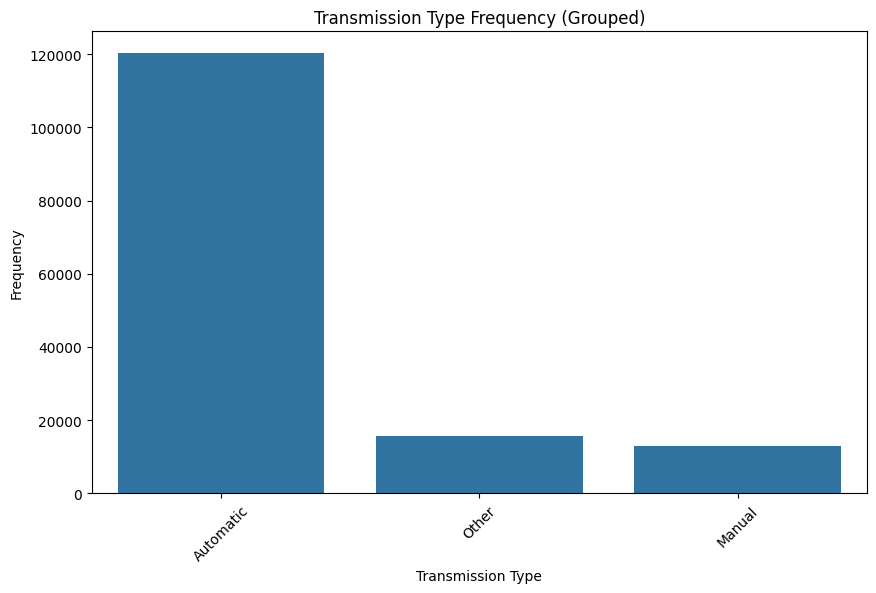

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='transmission_grouped', order= df_cleaned['transmission_grouped'].value_counts().index)
plt.title('Transmission Type Frequency (Grouped)')
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# transmission_grouped 열이 'Other'인 행의 transmission 값들만 추출
other_transmissions = df_cleaned[df_cleaned['transmission_grouped'] == 'Other']['transmission'].unique()

# 결과 확인
print("Other에 들어간 변속기 종류:", other_transmissions)

Other에 들어간 변속기 종류: ['Transmission with Dual Shift Mode' 'Transmission Overdrive Switch'
 '7-Speed' 'F' '6-Speed' '2' '–' 'Single-Speed Fixed Gear'
 'SCHEDULED FOR OR IN PRODUCTION']


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,brand_price_median,brand_price_std,price_standardized,transmission_grouped
0,0,28998.0,0.508053,2019,4.0,Gasoline,Automatic Transmission,Red,–,None reported,Yes,47500,-1.269963,285.000000,3.6,6 Cylinder,28998.0,36417.440419,0.508053,Automatic
1,1,15000.0,-0.052314,2004,45.0,Gasoline,Automatic Transmission,Silver,Black,None reported,Yes,8250,1.185568,250.000000,3.5,6 Cylinder,15000.0,129028.878148,-0.052314,Automatic
2,2,19470.0,-0.297062,2010,11.0,Gasoline,Transmission with Dual Shift Mode,Silver,Black,1 or more accident reported,Yes,12000,-0.045988,306.000000,3.8,6 Cylinder,19470.0,25146.302276,-0.297062,Other
3,3,31990.0,-0.250552,2013,28.0,Gasoline,6-Speed Automatic Transmission,Gray,Black,1 or more accident reported,Yes,13000,-0.180079,400.000000,3.5,6 Cylinder,31990.0,75792.706785,-0.250552,Automatic
4,4,36750.0,-0.260437,2010,21.0,Gasoline,7-Speed Automatic Transmission,Black,Black,1 or more accident reported,Yes,15400,0.095685,382.000000,5.5,8 Cylinder,36750.0,81977.585829,-0.260437,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,Automatic Transmission,Black,Black,None reported,Yes,19000,0.065819,340.000000,3.0,6 Cylinder,38999.0,87805.327853,-0.227765,Automatic
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,9-Speed Automatic Transmission,Silver,Black,1 or more accident reported,Yes,50000,-0.544904,237.000000,2.0,4 Cylinder,38999.0,87805.327853,0.125289,Automatic
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,9-Speed Automatic,Cirrus Silver Metallic,Black,None reported,Yes,36999,-1.463250,343.007683,2.0,6 Cylinder,36750.0,81977.585829,0.003037,Automatic
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,5-Speed Automatic Transmission,Blue,Gray,None reported,Yes,30000,2.566380,287.000000,3.5,6 Cylinder,18300.0,45793.363605,0.255496,Automatic


## accident_report

- accident_report: none reported: 1, 1 or more accident reported: 0으로 인코딩
- clean_title: 'Yes': 1, 'No': 0 으로 인코딩


In [ ]:
# 모든 값을 문자열로 변환한 뒤 소문자로 바꾸고 공백 제거 후 매핑
df_cleaned['accident_report'] = df_cleaned['accident_report'].astype(str).str.lower().str.strip().map({
    'none reported': 1,
    '1 or more accident reported': 0
})

df_cleaned['clean_title'] = df_cleaned['clean_title'].astype(str).str.lower().str.strip().map({
    'yes': 1,
    'no': 0
})

# 결과 확인
print(df_cleaned[['accident_report', 'clean_title']].head())


   accident_report  clean_title
0                1            1
1                1            1
2                0            1
3                0            1
4                0            1


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,brand_price_median,brand_price_std,price_standardized,transmission_grouped
0,0,28998.0,0.508053,2019,4.0,Gasoline,Automatic Transmission,Red,–,1,1,47500,-1.269963,285.000000,3.6,6 Cylinder,28998.0,36417.440419,0.508053,Automatic
1,1,15000.0,-0.052314,2004,45.0,Gasoline,Automatic Transmission,Silver,Black,1,1,8250,1.185568,250.000000,3.5,6 Cylinder,15000.0,129028.878148,-0.052314,Automatic
2,2,19470.0,-0.297062,2010,11.0,Gasoline,Transmission with Dual Shift Mode,Silver,Black,0,1,12000,-0.045988,306.000000,3.8,6 Cylinder,19470.0,25146.302276,-0.297062,Other
3,3,31990.0,-0.250552,2013,28.0,Gasoline,6-Speed Automatic Transmission,Gray,Black,0,1,13000,-0.180079,400.000000,3.5,6 Cylinder,31990.0,75792.706785,-0.250552,Automatic
4,4,36750.0,-0.260437,2010,21.0,Gasoline,7-Speed Automatic Transmission,Black,Black,0,1,15400,0.095685,382.000000,5.5,8 Cylinder,36750.0,81977.585829,-0.260437,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,Automatic Transmission,Black,Black,1,1,19000,0.065819,340.000000,3.0,6 Cylinder,38999.0,87805.327853,-0.227765,Automatic
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,9-Speed Automatic Transmission,Silver,Black,0,1,50000,-0.544904,237.000000,2.0,4 Cylinder,38999.0,87805.327853,0.125289,Automatic
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,9-Speed Automatic,Cirrus Silver Metallic,Black,1,1,36999,-1.463250,343.007683,2.0,6 Cylinder,36750.0,81977.585829,0.003037,Automatic
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,5-Speed Automatic Transmission,Blue,Gray,1,1,30000,2.566380,287.000000,3.5,6 Cylinder,18300.0,45793.363605,0.255496,Automatic


## transmission_Grouped 원핫인코딩

In [ ]:
# One-hot Encoding을 적용하여 새로운 컬럼으로 분리
df_cleaned = pd.get_dummies(df_cleaned, columns=['transmission_grouped'], prefix='transmission')

# 결과 확인
print(df_cleaned.head())


   id    brand     model  release_year  milage fuel_type  \
0   0  28998.0  0.508053          2019     4.0  Gasoline   
1   1  15000.0 -0.052314          2004    45.0  Gasoline   
2   2  19470.0 -0.297062          2010    11.0  Gasoline   
3   3  31990.0 -0.250552          2013    28.0  Gasoline   
4   4  36750.0 -0.260437          2010    21.0  Gasoline   

                        transmission exterior_color interior_color  \
0             Automatic Transmission            Red              –   
1             Automatic Transmission         Silver          Black   
2  Transmission with Dual Shift Mode         Silver          Black   
3     6-Speed Automatic Transmission           Gray          Black   
4     7-Speed Automatic Transmission          Black          Black   

   accident_report  ...  combined_component  horsepower  engine_displacement  \
0                1  ...           -1.269963       285.0                  3.6   
1                1  ...            1.185568       250.0   

In [ ]:

# True/False 값을 0/1로 변환
df_cleaned[['transmission_Automatic', 'transmission_Manual', 'transmission_Other']] = \
    df_cleaned[['transmission_Automatic', 'transmission_Manual', 'transmission_Other']].astype(int)

# 결과 확인
print(df_cleaned.head())


   id    brand     model  release_year  milage fuel_type  \
0   0  28998.0  0.508053          2019     4.0  Gasoline   
1   1  15000.0 -0.052314          2004    45.0  Gasoline   
2   2  19470.0 -0.297062          2010    11.0  Gasoline   
3   3  31990.0 -0.250552          2013    28.0  Gasoline   
4   4  36750.0 -0.260437          2010    21.0  Gasoline   

                        transmission exterior_color interior_color  \
0             Automatic Transmission            Red              –   
1             Automatic Transmission         Silver          Black   
2  Transmission with Dual Shift Mode         Silver          Black   
3     6-Speed Automatic Transmission           Gray          Black   
4     7-Speed Automatic Transmission          Black          Black   

   accident_report  ...  combined_component  horsepower  engine_displacement  \
0                1  ...           -1.269963       285.0                  3.6   
1                1  ...            1.185568       250.0   

In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,transmission,exterior_color,interior_color,accident_report,...,combined_component,horsepower,engine_displacement,number_cylinders,brand_price_median,brand_price_std,price_standardized,transmission_Automatic,transmission_Manual,transmission_Other
0,0,28998.0,0.508053,2019,4.0,Gasoline,Automatic Transmission,Red,–,1,...,-1.269963,285.000000,3.6,6 Cylinder,28998.0,36417.440419,0.508053,1,0,0
1,1,15000.0,-0.052314,2004,45.0,Gasoline,Automatic Transmission,Silver,Black,1,...,1.185568,250.000000,3.5,6 Cylinder,15000.0,129028.878148,-0.052314,1,0,0
2,2,19470.0,-0.297062,2010,11.0,Gasoline,Transmission with Dual Shift Mode,Silver,Black,0,...,-0.045988,306.000000,3.8,6 Cylinder,19470.0,25146.302276,-0.297062,0,0,1
3,3,31990.0,-0.250552,2013,28.0,Gasoline,6-Speed Automatic Transmission,Gray,Black,0,...,-0.180079,400.000000,3.5,6 Cylinder,31990.0,75792.706785,-0.250552,1,0,0
4,4,36750.0,-0.260437,2010,21.0,Gasoline,7-Speed Automatic Transmission,Black,Black,0,...,0.095685,382.000000,5.5,8 Cylinder,36750.0,81977.585829,-0.260437,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,Automatic Transmission,Black,Black,1,...,0.065819,340.000000,3.0,6 Cylinder,38999.0,87805.327853,-0.227765,1,0,0
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,9-Speed Automatic Transmission,Silver,Black,0,...,-0.544904,237.000000,2.0,4 Cylinder,38999.0,87805.327853,0.125289,1,0,0
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,9-Speed Automatic,Cirrus Silver Metallic,Black,1,...,-1.463250,343.007683,2.0,6 Cylinder,36750.0,81977.585829,0.003037,1,0,0
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,5-Speed Automatic Transmission,Blue,Gray,1,...,2.566380,287.000000,3.5,6 Cylinder,18300.0,45793.363605,0.255496,1,0,0


In [ ]:
# 불필요한 칼럼 삭제
df_cleaned = df_cleaned.drop(columns=['transmission', 'brand_price_median', 'brand_price_std', 'price_standardized'])

In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,exterior_color,interior_color,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other
0,0,28998.0,0.508053,2019,4.0,Gasoline,Red,–,1,1,47500,-1.269963,285.000000,3.6,6 Cylinder,1,0,0
1,1,15000.0,-0.052314,2004,45.0,Gasoline,Silver,Black,1,1,8250,1.185568,250.000000,3.5,6 Cylinder,1,0,0
2,2,19470.0,-0.297062,2010,11.0,Gasoline,Silver,Black,0,1,12000,-0.045988,306.000000,3.8,6 Cylinder,0,0,1
3,3,31990.0,-0.250552,2013,28.0,Gasoline,Gray,Black,0,1,13000,-0.180079,400.000000,3.5,6 Cylinder,1,0,0
4,4,36750.0,-0.260437,2010,21.0,Gasoline,Black,Black,0,1,15400,0.095685,382.000000,5.5,8 Cylinder,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,Black,Black,1,1,19000,0.065819,340.000000,3.0,6 Cylinder,1,0,0
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,Silver,Black,0,1,50000,-0.544904,237.000000,2.0,4 Cylinder,1,0,0
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,Cirrus Silver Metallic,Black,1,1,36999,-1.463250,343.007683,2.0,6 Cylinder,1,0,0
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,Blue,Gray,1,1,30000,2.566380,287.000000,3.5,6 Cylinder,1,0,0


## 외장, 내장 변수 인코딩
-  외장 : 블랙 , 화이트, 실버
-  내장 : 블랙


In [ ]:
import numpy as np

# 'Black'인 경우 1, 아닌 경우 0으로 인코딩
df_cleaned['interior_color_black'] = np.where(df_cleaned['interior_color'] == 'Black', 1, 0)

# 결과 확인
print(df_cleaned[['interior_color', 'interior_color_black']].head())


  interior_color  interior_color_black
0              –                     0
1          Black                     1
2          Black                     1
3          Black                     1
4          Black                     1


In [ ]:
import numpy as np

# 'Black', 'White', 'Gray'는 무채색으로 1, 그 외는 0으로 인코딩
df_cleaned['exterior_color_BWG'] = np.where(df_cleaned['exterior_color'].isin(['Black', 'White', 'Gray']), 1, 0)

# 결과 확인
print(df_cleaned[['exterior_color', 'exterior_color_BWG']].head())


  exterior_color  exterior_color_BWG
0            Red                   0
1         Silver                   0
2         Silver                   0
3           Gray                   1
4          Black                   1


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,exterior_color,interior_color,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other,interior_color_black,exterior_color_BWG
0,0,28998.0,0.508053,2019,4.0,Gasoline,Red,–,1,1,47500,-1.269963,285.000000,3.6,6 Cylinder,1,0,0,0,0
1,1,15000.0,-0.052314,2004,45.0,Gasoline,Silver,Black,1,1,8250,1.185568,250.000000,3.5,6 Cylinder,1,0,0,1,0
2,2,19470.0,-0.297062,2010,11.0,Gasoline,Silver,Black,0,1,12000,-0.045988,306.000000,3.8,6 Cylinder,0,0,1,1,0
3,3,31990.0,-0.250552,2013,28.0,Gasoline,Gray,Black,0,1,13000,-0.180079,400.000000,3.5,6 Cylinder,1,0,0,1,1
4,4,36750.0,-0.260437,2010,21.0,Gasoline,Black,Black,0,1,15400,0.095685,382.000000,5.5,8 Cylinder,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,Black,Black,1,1,19000,0.065819,340.000000,3.0,6 Cylinder,1,0,0,1,1
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,Silver,Black,0,1,50000,-0.544904,237.000000,2.0,4 Cylinder,1,0,0,1,0
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,Cirrus Silver Metallic,Black,1,1,36999,-1.463250,343.007683,2.0,6 Cylinder,1,0,0,1,0
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,Blue,Gray,1,1,30000,2.566380,287.000000,3.5,6 Cylinder,1,0,0,0,0


In [ ]:
df_cleaned = df_cleaned.drop(columns=['exterior_color', 'interior_color'])

In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other,interior_color_black,exterior_color_BWG
0,0,28998.0,0.508053,2019,4.0,Gasoline,1,1,47500,-1.269963,285.000000,3.6,6 Cylinder,1,0,0,0,0
1,1,15000.0,-0.052314,2004,45.0,Gasoline,1,1,8250,1.185568,250.000000,3.5,6 Cylinder,1,0,0,1,0
2,2,19470.0,-0.297062,2010,11.0,Gasoline,0,1,12000,-0.045988,306.000000,3.8,6 Cylinder,0,0,1,1,0
3,3,31990.0,-0.250552,2013,28.0,Gasoline,0,1,13000,-0.180079,400.000000,3.5,6 Cylinder,1,0,0,1,1
4,4,36750.0,-0.260437,2010,21.0,Gasoline,0,1,15400,0.095685,382.000000,5.5,8 Cylinder,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,1,1,19000,0.065819,340.000000,3.0,6 Cylinder,1,0,0,1,1
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,0,1,50000,-0.544904,237.000000,2.0,4 Cylinder,1,0,0,1,0
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,1,1,36999,-1.463250,343.007683,2.0,6 Cylinder,1,0,0,1,0
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,1,1,30000,2.566380,287.000000,3.5,6 Cylinder,1,0,0,0,0


In [ ]:
# 숫자 부분만 추출하여 정수형으로 변환
df_cleaned['number_cylinders'] = df_cleaned['number_cylinders'].str.extract('(\d+)').astype(float)

# 결과 확인
print(df_cleaned[['number_cylinders']].head())


   number_cylinders
0               6.0
1               6.0
2               6.0
3               6.0
4               8.0


In [ ]:
df_cleaned

,id,brand,model,release_year,milage,fuel_type,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other,interior_color_black,exterior_color_BWG
0,0,28998.0,0.508053,2019,4.0,Gasoline,1,1,47500,-1.269963,285.000000,3.6,6.0,1,0,0,0,0
1,1,15000.0,-0.052314,2004,45.0,Gasoline,1,1,8250,1.185568,250.000000,3.5,6.0,1,0,0,1,0
2,2,19470.0,-0.297062,2010,11.0,Gasoline,0,1,12000,-0.045988,306.000000,3.8,6.0,0,0,1,1,0
3,3,31990.0,-0.250552,2013,28.0,Gasoline,0,1,13000,-0.180079,400.000000,3.5,6.0,1,0,0,1,1
4,4,36750.0,-0.260437,2010,21.0,Gasoline,0,1,15400,0.095685,382.000000,5.5,8.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150821,150821,38999.0,-0.227765,2015,63.0,Gasoline,1,1,19000,0.065819,340.000000,3.0,6.0,1,0,0,1,1
150822,150822,38999.0,0.125289,2020,64.0,Gasoline,0,1,50000,-0.544904,237.000000,2.0,4.0,1,0,0,1,0
150823,150823,36750.0,0.003037,2021,8.0,Gasoline,1,1,36999,-1.463250,343.007683,2.0,6.0,1,0,0,1,0
150824,150824,18300.0,0.255496,2001,116.0,Gasoline,1,1,30000,2.566380,287.000000,3.5,6.0,1,0,0,0,0


In [ ]:
# 지정한 경로에 df_cleaned 데이터를 CSV로 저장
df_cleaned.to_csv('/content/drive/MyDrive/ILOVEDART/df_cleaned.csv', index=False)

print("Data saved to '/content/drive/MyDrive/ILOVEDART/df_cleaned.csv'")


Data saved to '/content/drive/MyDrive/ILOVEDART/df_cleaned.csv'


# 1. catboost

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# import libraries

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

In [ ]:
# Read the data
train = pd.read_csv('/content/drive/MyDrive/ILOVEDART/df_cleaned.csv')


In [ ]:
train.head()

,id,brand,model,release_year,milage,fuel_type,accident_report,clean_title,price,combined_component,horsepower,engine_displacement,number_cylinders,transmission_Automatic,transmission_Manual,transmission_Other,interior_color_black,exterior_color_BWG
0,0,28998.0,0.508053,2019,4.0,Gasoline,1,1,47500,-1.269963,285.0,3.6,6.0,1,0,0,0,0
1,1,15000.0,-0.052314,2004,45.0,Gasoline,1,1,8250,1.185568,250.0,3.5,6.0,1,0,0,1,0
2,2,19470.0,-0.297062,2010,11.0,Gasoline,0,1,12000,-0.045988,306.0,3.8,6.0,0,0,1,1,0
3,3,31990.0,-0.250552,2013,28.0,Gasoline,0,1,13000,-0.180079,400.0,3.5,6.0,1,0,0,1,1
4,4,36750.0,-0.260437,2010,21.0,Gasoline,0,1,15400,0.095685,382.0,5.5,8.0,1,0,0,1,1


In [ ]:
# 독립 변수와 타겟 변수 설정
X = train.drop(columns=['price','id'])  # 'price'를 제외한 모든 열이 독립 변수
y = train['price']  # 'price'가 타겟 변수


In [ ]:
# CatBoost 설치
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [ ]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost에 사용할 범주형 변수 인덱스
cat_features = X.select_dtypes(include='object').columns.tolist()  # 범주형 열 이름 자동 선택


In [ ]:
from catboost import CatBoostRegressor
# CatBoostRegressor 모델 초기화
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)



In [ ]:

# 모델 학습 (cat_features 지정)
model.fit(X_train, y_train, cat_features=cat_features)

0:	learn: 73608.7841603	total: 201ms	remaining: 3m 20s
1:	learn: 69188.8120502	total: 366ms	remaining: 3m 2s
2:	learn: 65243.6816428	total: 508ms	remaining: 2m 48s
3:	learn: 61673.6537871	total: 587ms	remaining: 2m 26s
4:	learn: 58592.6741371	total: 690ms	remaining: 2m 17s
5:	learn: 55870.3488795	total: 772ms	remaining: 2m 7s
6:	learn: 53449.4018191	total: 880ms	remaining: 2m 4s
7:	learn: 51342.3975597	total: 1.03s	remaining: 2m 7s
8:	learn: 49558.5755423	total: 1.09s	remaining: 1m 59s
9:	learn: 47900.2476382	total: 1.19s	remaining: 1m 57s
10:	learn: 46489.8744769	total: 1.27s	remaining: 1m 54s
11:	learn: 45157.2248701	total: 1.4s	remaining: 1m 54s
12:	learn: 43999.7772445	total: 1.5s	remaining: 1m 53s
13:	learn: 43008.1879861	total: 1.6s	remaining: 1m 52s
14:	learn: 42131.9413971	total: 1.68s	remaining: 1m 49s
15:	learn: 41223.9224490	total: 1.83s	remaining: 1m 52s
16:	learn: 40464.8963503	total: 2s	remaining: 1m 55s
17:	learn: 39854.2179454	total: 2.18s	remaining: 1m 58s
18:	learn: 3

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 41581.246955869254


In [ ]:
# 특성 중요도 추출
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# 특성 중요도를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 결과 확인
print(feature_importance_df)


                   Feature  Importance
1                    model   49.635729
0                    brand   21.891580
7       combined_component    7.660893
9      engine_displacement    5.825411
3                   milage    4.914982
2             release_year    4.418190
8               horsepower    2.693735
15      exterior_color_BWG    0.942813
14    interior_color_black    0.620038
4                fuel_type    0.602945
10        number_cylinders    0.592758
13      transmission_Other    0.077577
5          accident_report    0.052353
11  transmission_Automatic    0.048543
12     transmission_Manual    0.022287
6              clean_title    0.000166
